<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/M%C3%A9todo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

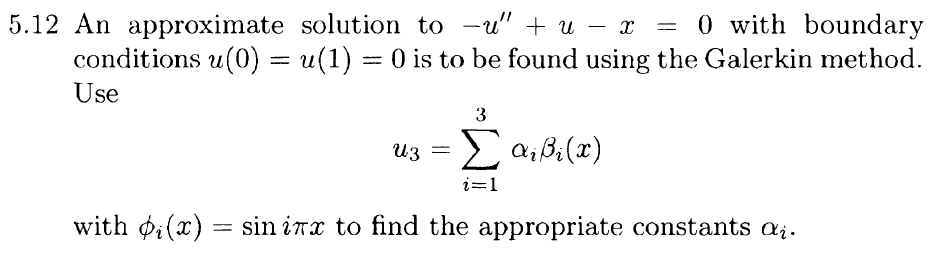

In [2]:
import sympy as sp                      # Para las soluciones, variables, ecuaciones
import numpy as np                      # Para los arrays (vectores) y graficas
import matplotlib.pyplot as plt         # Para las graficas
from tabulate import tabulate           # Para las tablas (presentar los errores)

In [3]:
x, a, b = sp.symbols("x, a, b")         # Variables
u = sp.Function("u")                    # Funcion

In [18]:
ecu = -u(x).diff(x, 2) + u(x) - x        # Ecuacion
ecu

-x + u(x) - Derivative(u(x), (x, 2))

In [ ]:
sp.dsolve(ecu, u(x))

In [11]:
sol = sp.dsolve(ecu, ics={u(0):0, u(1):0}) # Solucionamos la ecuacion con las restricciones
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

In [12]:
valorex = sp.lambdify(x, sp.simplify(sol.rhs), "numpy")   # Creamos un metodo que nos regresa los valores exactos (reales)

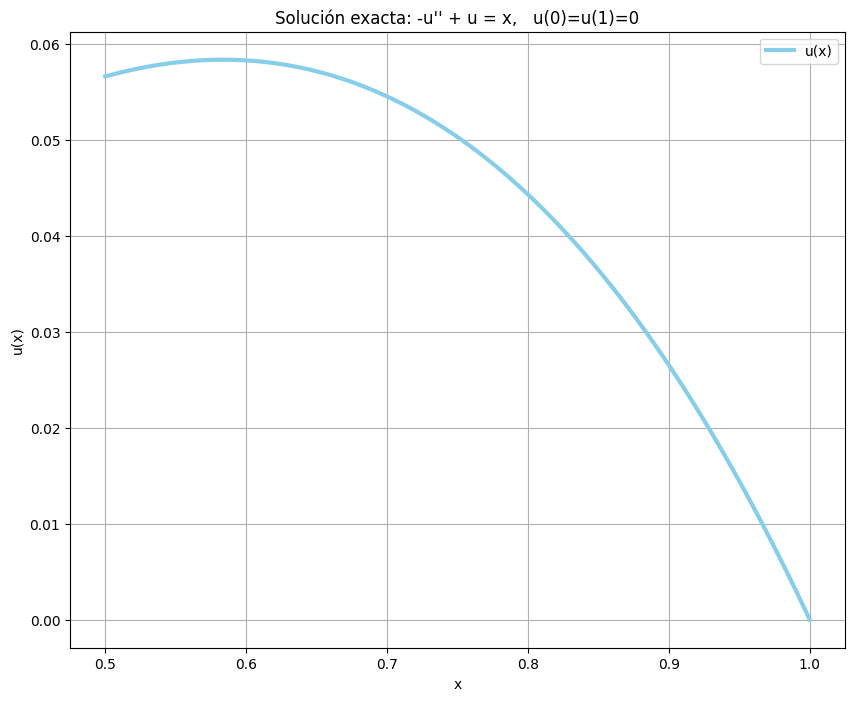

In [16]:
xx = np.linspace(0.5, 1, 200)                          # Valores en X
yy = valorex(xx)                                     # Valores en Y
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="u(x)", linewidth=3, color="skyblue")     # Linea
plt.title("Solución exacta: -u'' + u = x,   u(0)=u(1)=0")  # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()

In [19]:
un = a*x*(1-x) + b*x**2*(1-x)              # Guardamos la ecuacion en un
un

a*x*(1 - x) + b*x**2*(1 - x)

In [20]:
un2 = sp.simplify(sp.diff(un, x, 2))    # Guardamos la segunda derivada en un2, usamos simplify para reducir terminos
un2

-2*a - 6*b*x + 2*b

In [21]:
e = sp.simplify(-un2 + un - x)           # Guardamos la ecuacion en e, usamos simplify para reducir terminos
e

-a*x*(x - 1) + 2*a - b*x**2*(x - 1) + 6*b*x - 2*b - x

In [24]:
pa=sp.integrate(e*x*(1-x), (x, 0, 1))          # Guardamos la integral de e^2, usamos simplify para reducir terminos
pa

11*a/30 + 11*b/60 - 1/12

In [25]:
pb=sp.integrate(e*x**2*(1-x), (x, 0, 1))
pb

11*a/60 + b/7 - 1/20

In [26]:
sol2 = sp.solve([pa, pb], [a, b])                  # Resolvemos las parciales
sol2

{a: 69/473, b: 7/43}

In [27]:
valores = sp.lambdify(x, un.subs(sol2) , "numpy")    # Creamos un metodo que nos regresa los valores esperados (calculados con el metodo)

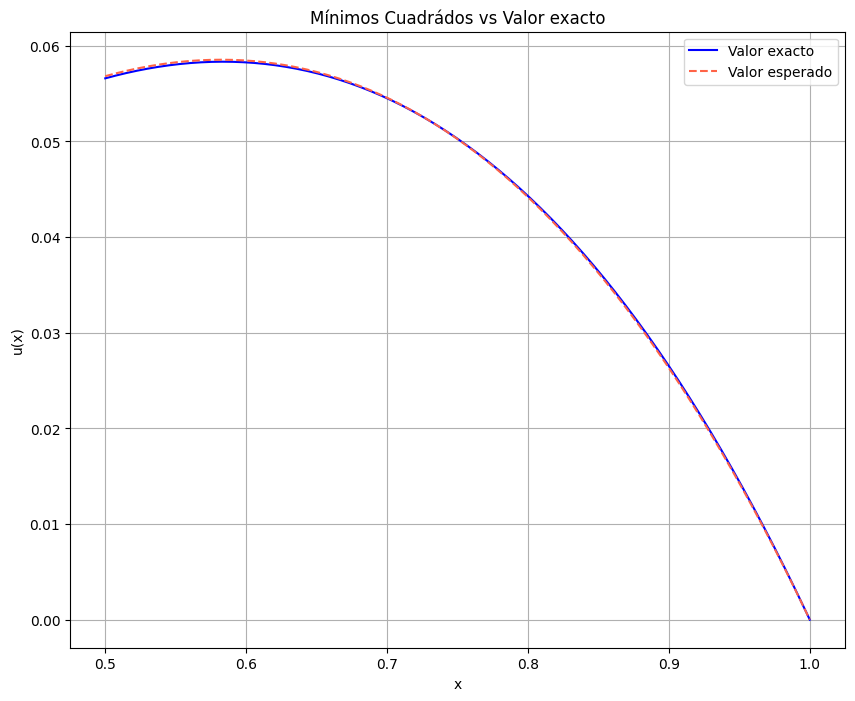

In [28]:
xx = np.linspace(0.5, 1, 200)                        # Valores en X
y2 = valores(xx)                                     # Valores en Y2 (esperados)
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="Valor exacto", color="blue")            # Linea exactos
plt.plot(xx, y2,"--", label="Valor esperado", color="tomato")      # Linea esperados
plt.title("Mínimos Cuadrádos vs Valor exacto")    # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()

In [30]:
xx = np.linspace(0, 1, 10)                    # Valores en X
vex = valorex(xx)                             # Valores exactos
v1 = valores(xx)                              # Valores Minimos Cuadrados

error = abs(vex-v1)                           # Error Minimos Cuadrados

tabla = list(zip(xx, vex, v1, error))         # Creamos una tabla con los valores
head = ["x", "Valor exacto", "Método de Galerkin", "Error absoluto Galerkin"]  # Titulos
print(tabulate(tabla, headers=head, tablefmt="heavy_grid"))                  # Imprimimos la tabla

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        x ┃   Valor exacto ┃   Método de Galerkin ┃   Error absoluto Galerkin ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0        ┃   -0           ┃            0         ┃               0           ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.111111 ┃    0.01637     ┃            0.0161941 ┃               0.000175895 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.222222 ┃    0.0315691   ┃            0.031466  ┃               0.000103171 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.333333 ┃    0.0444121   ┃            0.0444758 ┃               6.36475e-05 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ 0.444444 ┃    0.0536845   ┃            0.0538837 ┃               0.000199155 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━